In [5]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

In [6]:
X = np.arange(6).reshape(3, 2)

In [7]:
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [10]:
poly = PolynomialFeatures(2)
poly.fit_transform(X)
# 처음부터 상수항, x1, x2, x1^2, x1*x2, x2^2

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [12]:
poly = PolynomialFeatures(interaction_only=True)
poly.fit_transform(X)
# 제곱항 제외.

array([[ 1.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  6.],
       [ 1.,  4.,  5., 20.]])

In [13]:
import matplotlib.pyplot as plt

In [14]:
def f(size):
    x = np.linspace(0, 5, size)
    y = x * np.sin(x ** 2) + 1
    return (x,y)

def sample(size):
    x = np.linspace(0, 5, size)
    y = x * np.sin(x ** 2) + 1 + np.random.randn(x.size)*0.5
    return (x,y)

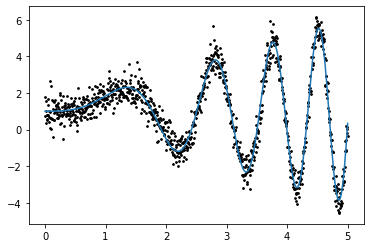

In [15]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
X, y = sample(1000)
plt.scatter(X, y, s=3, c="black")
plt.show()

In [16]:
#이런 곡선형태의 데이터분포를 적합시키자

In [17]:
X.shape, y.shape
# 각각 1 dim 인데 2 dimension으로 바꿔줘야 함.

((1000,), (1000,))

In [18]:
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

In [19]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

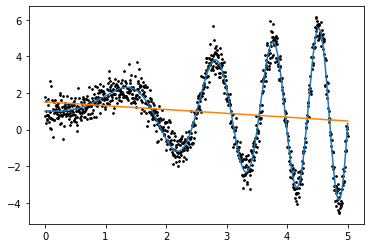

In [21]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s=3, c="black")
plt.plot(X.flatten(), lr.predict(X).flatten())
plt.show()

In [33]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=16)
X_poly = poly_features.fit_transform(X)
X_poly[:10]

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [1.00000000e+00, 5.00500501e-03, 2.50500751e-05, 1.25375751e-07,
        6.27506263e-10, 3.14067198e-12, 1.57190790e-14, 7.86740691e-17,
        3.93764110e-19, 1.97079134e-21, 9.86382051e-24, 4.93684710e-26,
        2.47089445e-28, 1.23668391e-30, 6.18960915e-33, 3.09790248e-35,
        1.55050174e-37],
       [1.00000000e+00, 1.00100100e-02, 1.00200300e-04, 1.00300601e-06,
        1.00401002e-08, 1.00501504e-10, 1.00602106e-12, 1.00702808e-14,
        1.00803612e-16, 1.00904517e-18, 1.01005522e-20, 1.01106629e-22,
        1.01207837e-24, 1.01309146e-26, 1.01410556e-28, 1.01512068e-30,
        1.01613682e-32],
       [1.00000000e+00, 1.50150150e-02, 2.25450676e-04, 3.385

In [34]:
lr = LinearRegression()
lr.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

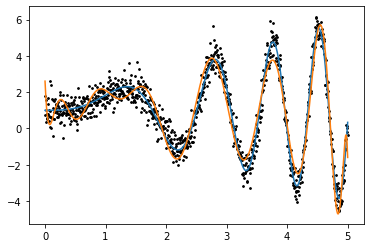

In [35]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s=3, c="black")
plt.plot(X.flatten(), lr.predict(X_poly).flatten())
plt.show()

In [37]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [38]:
poly_range = list(range(10, 50))
rmse_lr_list = []
rmse_lasso_list = []
rmse_ridge_list = []

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

for poly_value in poly_range:
    poly_features = PolynomialFeatures(degree=poly_value)
    X_poly = poly_features.fit_transform(X)
    lr = LinearRegression()
    lr.fit(X_poly,y)
    
    rmse_lr_list.append(rmse(lr.predict(X_poly), y))

    lasso = Lasso()
    lasso.fit(X_poly,y)
    rmse_lasso_list.append(rmse(lasso.predict(X_poly), y))
    
    ridge = Ridge()
    ridge.fit(X_poly,y)
    rmse_ridge_list.append(rmse(ridge.predict(X_poly), y))

C:\Users\cross\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2048.72820994557, tolerance: 0.4483525376571597
  positive)
C:\Users\cross\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2041.7494978356153, tolerance: 0.4483525376571597
  positive)
C:\Users\cross\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.00523e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\cross\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2035.5839238535573, tolerance: 0.4483525376571597
  positive)
C:\Users\cross

C:\Users\cross\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1931.0872092530474, tolerance: 0.4483525376571597
  positive)
C:\Users\cross\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1923.2441922179635, tolerance: 0.4483525376571597
  positive)
C:\Users\cross\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1915.2953385538726, tolerance: 0.4483525376571597
  positive)
C:\Users\cross\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

In [39]:
import pandas as pd
from pandas import DataFrame
data = {"poly_range":poly_range, "lr_rmse":rmse_lr_list, 
        "lasso_rmse":rmse_lasso_list,"ridge_rmse":rmse_ridge_list}
df = DataFrame(data).set_index("poly_range")
df

,lr_rmse,lasso_rmse,ridge_rmse
poly_range,,,
10,1.904578,2.205553,1.930204
11,1.894195,2.213844,1.907617
12,1.648523,2.218794,1.905063
13,1.380234,2.221789,1.876344
14,1.368227,2.223599,1.706390
15,0.932100,2.224645,1.503317
16,0.716546,2.225144,1.511192
17,0.686025,2.225232,1.322866
18,0.713926,2.225016,0.910355


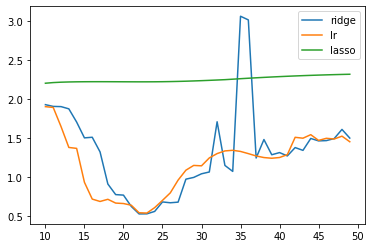

In [40]:
plt.plot(poly_range, df["ridge_rmse"], label="ridge")
plt.plot(poly_range, df["lr_rmse"], label="lr")
plt.plot(poly_range, df["lasso_rmse"], label="lasso")
plt.legend()
plt.show()

In [41]:
df.min()

lr_rmse       0.537099
lasso_rmse    2.205553
ridge_rmse    0.526046
dtype: float64

In [42]:
df = pd.read_csv("yield.csv", sep="\t")
df.head()

FileNotFoundError: [Errno 2] File b'yield.csv' does not exist: b'yield.csv'